# Exploratory Data Analysis (EDA)

In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\rache\anaconda3\envs\learn-env\lib\site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import plotly.express as px
import math
import scipy.stats as stats
from scipy import stats
import missingno as ms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Everything sklearn!
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, make_scorer, roc_auc_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.pipeline import Pipeline

In [3]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#Import data and see the headers
df1 = pd.read_csv(r"Terry_Cleaned.csv")
df1.head()

,Unnamed: 0,Subject Age Group,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Reported Day of Week,Reported Year,Reported Month
0,0,26 - 35,None,1984,1.000,Black or African American,Asian,1.000,Other,S,0.000,0.000,South,Friday,2015,10
1,4,26 - 35,None,1977,1.000,White,Black or African American,1.000,Other,T,0.000,0.000,West,Friday,2015,4
2,5,26 - 35,None,1973,1.000,White,Black or African American,1.000,Other,T,0.000,0.000,West,Sunday,2015,4
3,6,26 - 35,None,1985,1.000,Hispanic or Latino,Unknown,0.000,Other,W,0.000,0.000,West,Wednesday,2015,5
4,7,26 - 35,None,1985,1.000,Hispanic or Latino,White,1.000,Other,W,0.000,0.000,West,Wednesday,2015,5


In [5]:
df1 = df1.drop(columns=['Unnamed: 0'], axis=1)
df1.head()

,Subject Age Group,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Reported Day of Week,Reported Year,Reported Month
0,26 - 35,None,1984,1.000,Black or African American,Asian,1.000,Other,S,0.000,0.000,South,Friday,2015,10
1,26 - 35,None,1977,1.000,White,Black or African American,1.000,Other,T,0.000,0.000,West,Friday,2015,4
2,26 - 35,None,1973,1.000,White,Black or African American,1.000,Other,T,0.000,0.000,West,Sunday,2015,4
3,26 - 35,None,1985,1.000,Hispanic or Latino,Unknown,0.000,Other,W,0.000,0.000,West,Wednesday,2015,5
4,26 - 35,None,1985,1.000,Hispanic or Latino,White,1.000,Other,W,0.000,0.000,West,Wednesday,2015,5


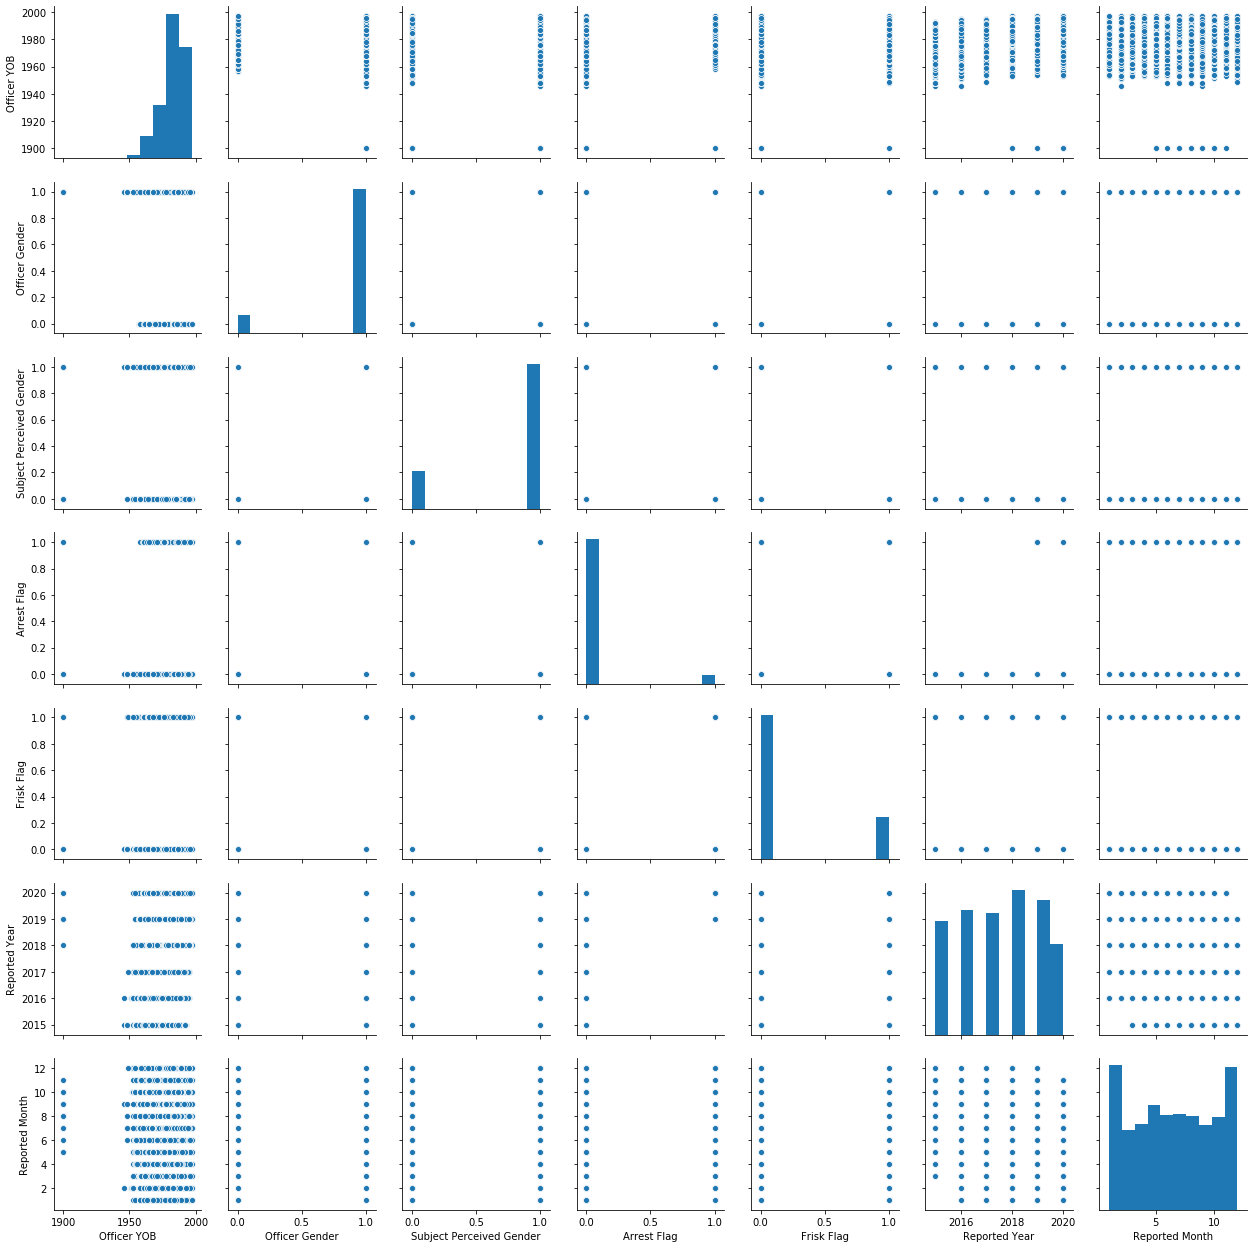

In [6]:
sns.pairplot(df1, palette="colorblind")

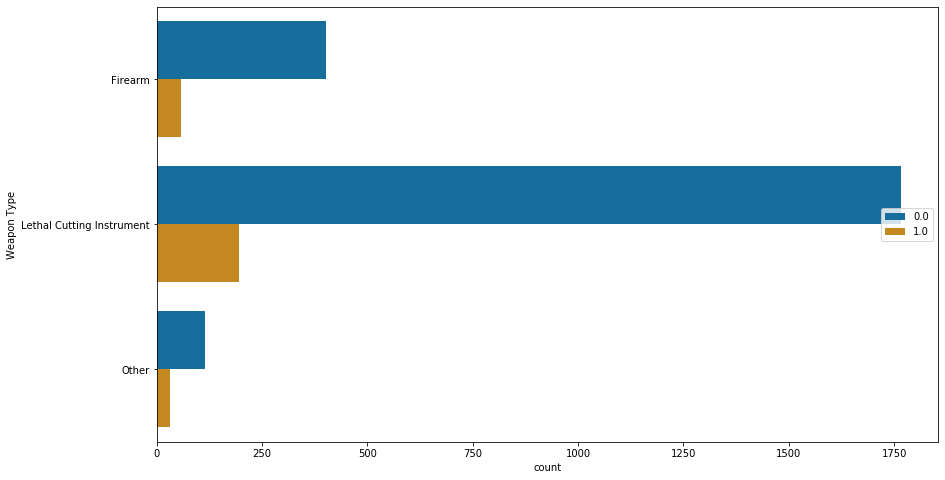

In [7]:
#Plot weapon type vs. stop resolution
weapon = df1[(df1['Weapon Type'] != 'None')]
plt.figure(figsize=(14, 8))
sns.countplot(y=weapon['Weapon Type'], hue=weapon['Arrest Flag'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = & 1.0 = 

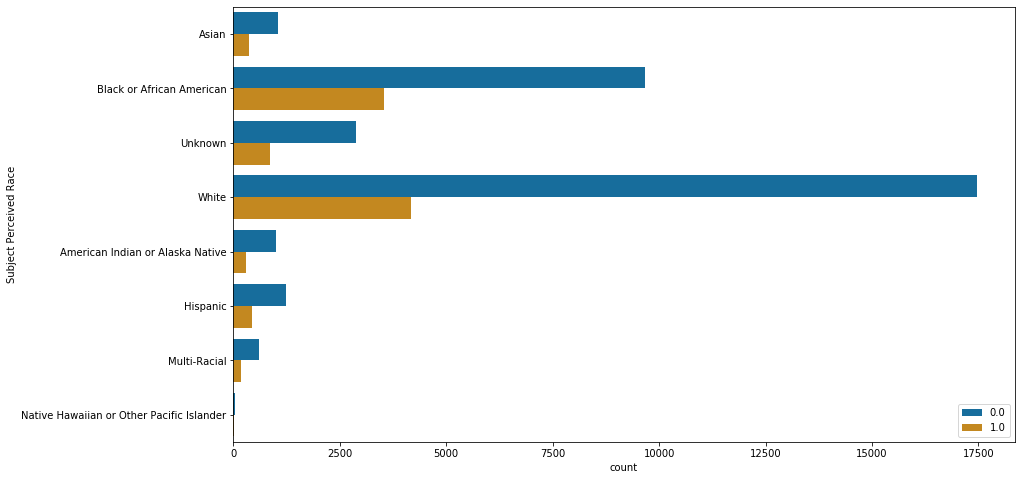

In [8]:
#Plot frisk vs. subject perceived race
srace = df1[(df1['Subject Perceived Race'] != 'None')]
plt.figure(figsize=(14, 8))
sns.countplot(y=srace['Subject Perceived Race'], hue=srace['Frisk Flag'], palette="colorblind")
plt.legend(loc='lower right')
plt.show()

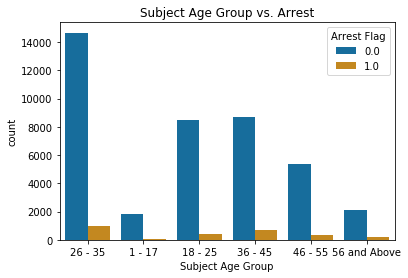

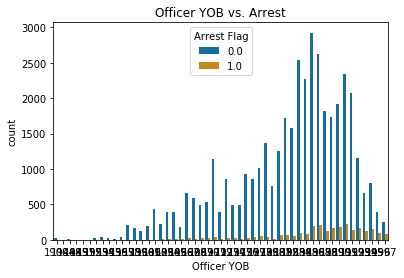

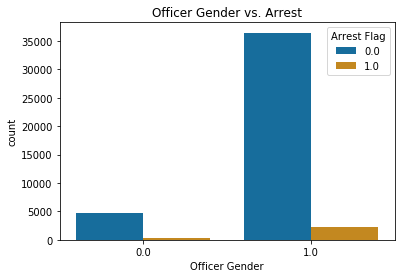

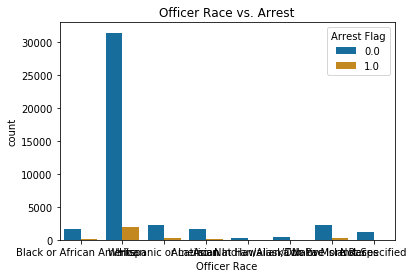

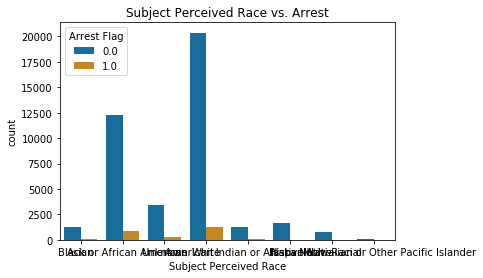

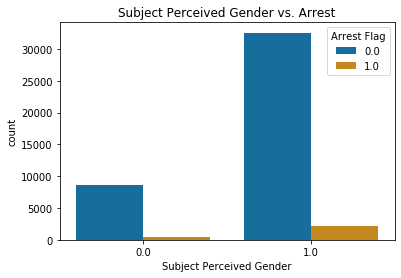

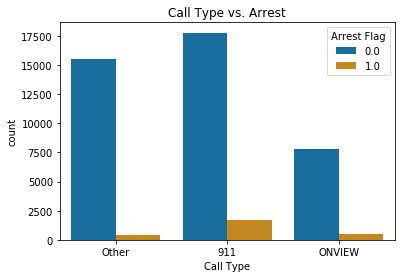

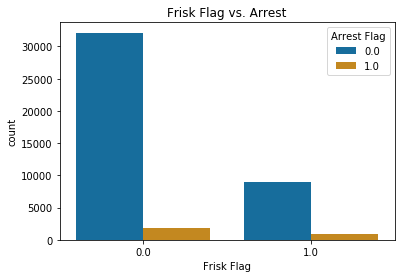

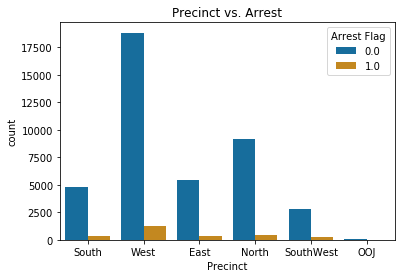

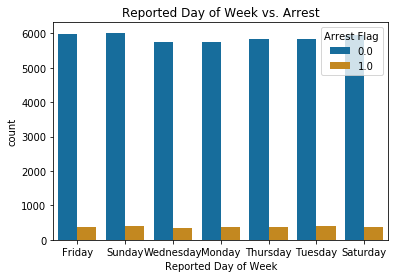

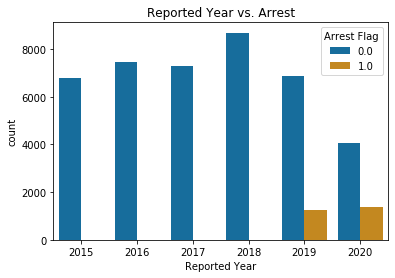

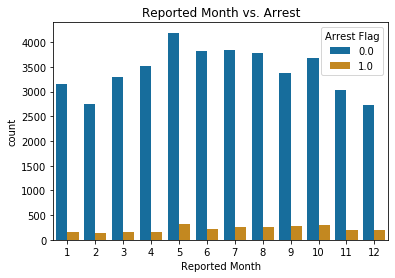

In [11]:
#Plot features vs. target, removing larger categorical variables
catsmall = df1.drop(columns=['Arrest Flag', 'Officer Squad', 'Weapon Type'], axis=1)

# Remember that 0.0 = Non-arrest and 1.0 = Arrest
for col in catsmall.columns:
    plt.subplots(1, 1)
    sns.countplot(x=catsmall[col], hue=df1['Arrest Flag'], palette="colorblind")
    plt.title('{} vs. Arrest'.format(col))

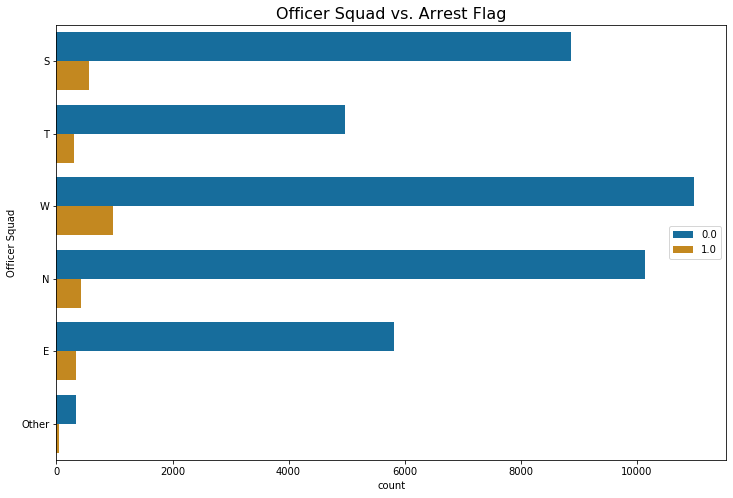

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df1['Officer Squad'], hue=df1['Arrest Flag'], palette="colorblind")
plt.title('Officer Squad vs. Arrest Flag', fontsize=(16))
plt.legend(loc='center right')
plt.show()

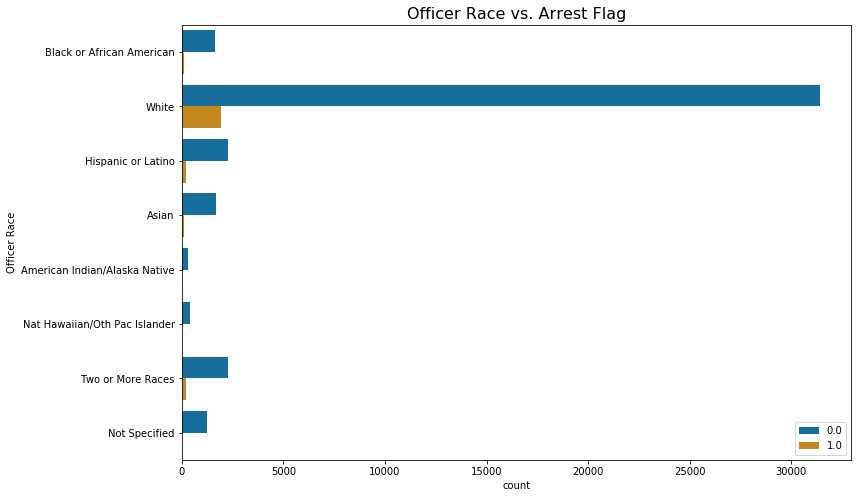

In [13]:
# Seeing the initial pattern with white officers and the stop resolution
plt.figure(figsize=(12, 8))
sns.countplot(y=df1['Officer Race'], hue=df1['Arrest Flag'], palette="colorblind")
plt.title('Officer Race vs. Arrest Flag', fontsize=(16))
plt.legend(loc='lower right')
plt.show()

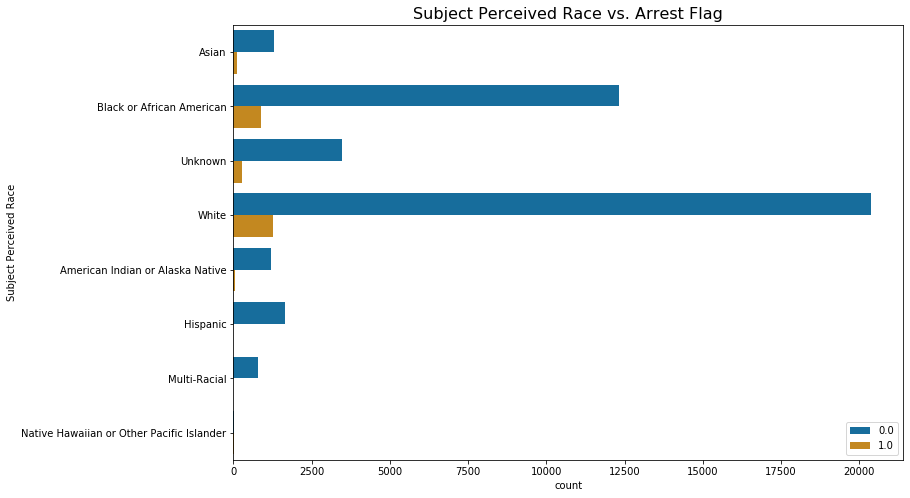

In [14]:
# Seeing the initial pattern with subject race and the stop resolution
plt.figure(figsize=(12, 8))
sns.countplot(y=df1['Subject Perceived Race'], hue=df1['Arrest Flag'], palette="colorblind")
plt.title('Subject Perceived Race vs. Arrest Flag', fontsize=(16))
plt.legend(loc='lower right')
plt.show()

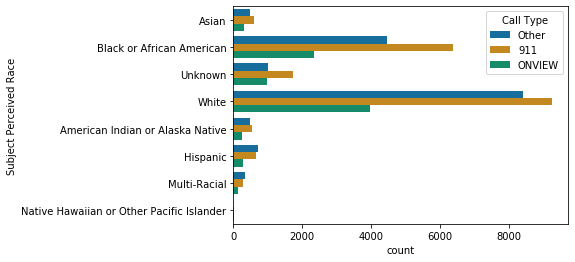

In [15]:
# Visualize
sns.countplot(y = 'Subject Perceived Race', hue = 'Call Type', data = df1, palette="colorblind")

1. What officer demographics influence policing including arrests?

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

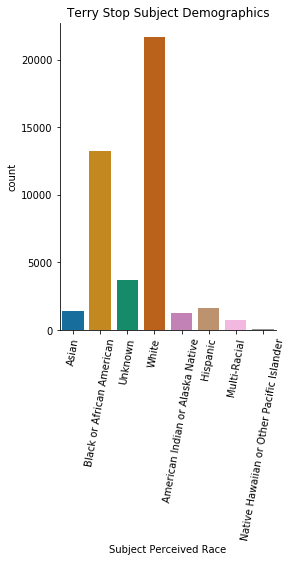

In [16]:
fig = plt.gcf() # Gets a reference to the current figure when using pyplot. Similar to figure()
fig.set_size_inches(20, 17) # Sets size of the plot
sns.catplot(x= 'Subject Perceived Race', kind='count', data=df1,palette="colorblind") # Plots a countplot- a histogram across categorical variables
plt.title("Terry Stop Subject Demographics")
plt.xticks(rotation=80) #Rotate x-labels so that the labels do not overlap

In [17]:
# For the second model I want to focus on just aspects of suspicious stop to see the aspects of race
# I want to understand what aspects the officer find to be suspicious (ie race, gender, weapon, etc)

# 1. How does officer and subject  race affect stop, frisk, and arrest?

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

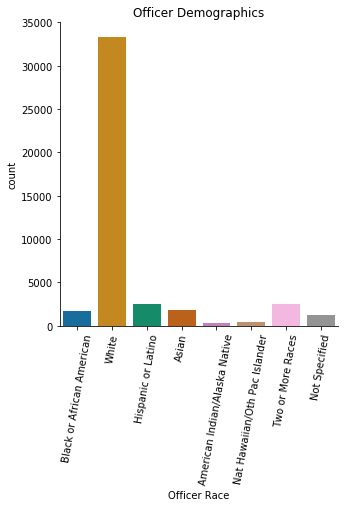

In [18]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Race', kind='count', data=df1, palette="colorblind")
plt.title("Officer Demographics")
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

<Figure size 2880x2880 with 0 Axes>

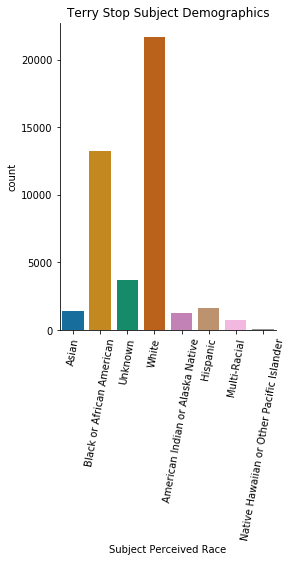

In [19]:
fig = plt.gcf()
fig.set_size_inches(40, 40)
sns.catplot(x= 'Subject Perceived Race', kind='count', data=df1, palette="colorblind")
plt.title("Terry Stop Subject Demographics")
plt.xticks(rotation=80)

# Is there a difference in race among the different call types?

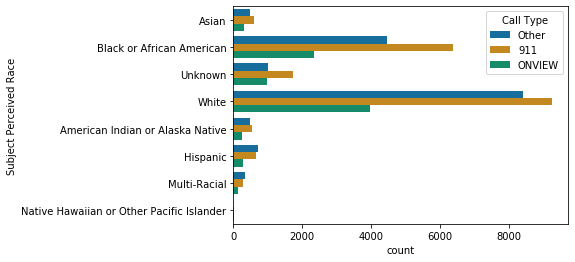

In [20]:
# Visualize the difference of call types by subject race
sns.countplot(y = 'Subject Perceived Race', hue = 'Call Type', data = df1, palette="colorblind")

# How does gender influence stop and arrest?

(array([0, 1]), <a list of 2 Text xticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

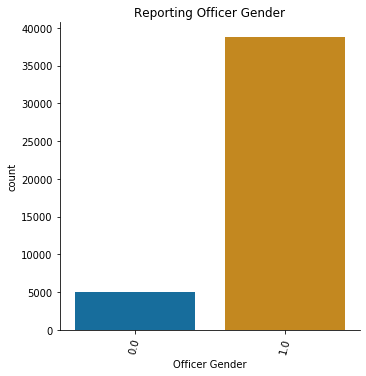

In [21]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Gender', kind='count', data=df1, palette="colorblind")
plt.title("Reporting Officer Gender")
plt.xticks(rotation=75)

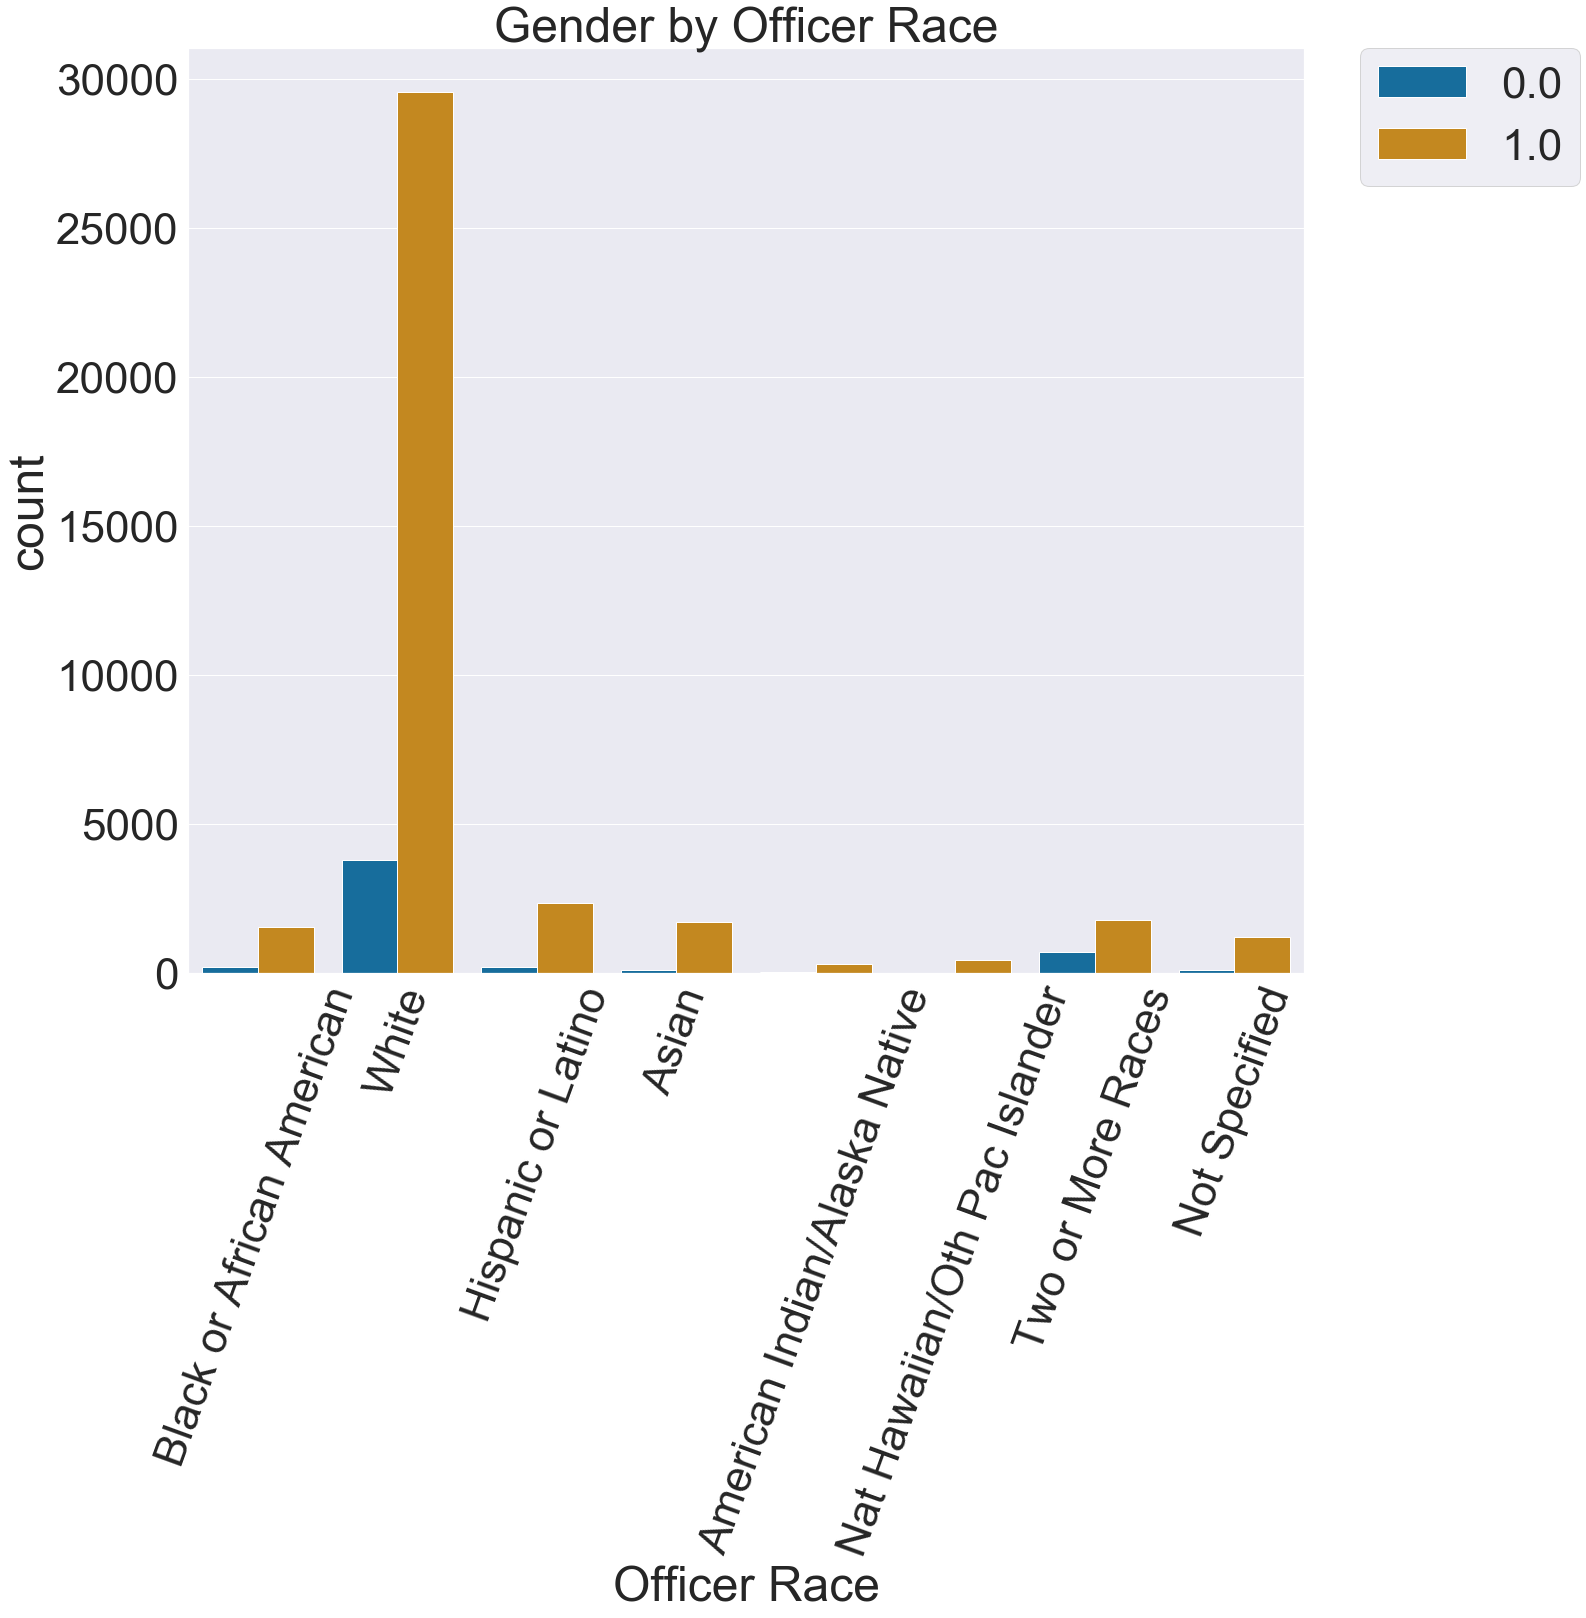

In [22]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4) # Set font on the plot
sns.countplot(x='Officer Race', hue='Officer Gender', data=df1, palette="colorblind") 
plt.title('Gender by Officer Race')
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

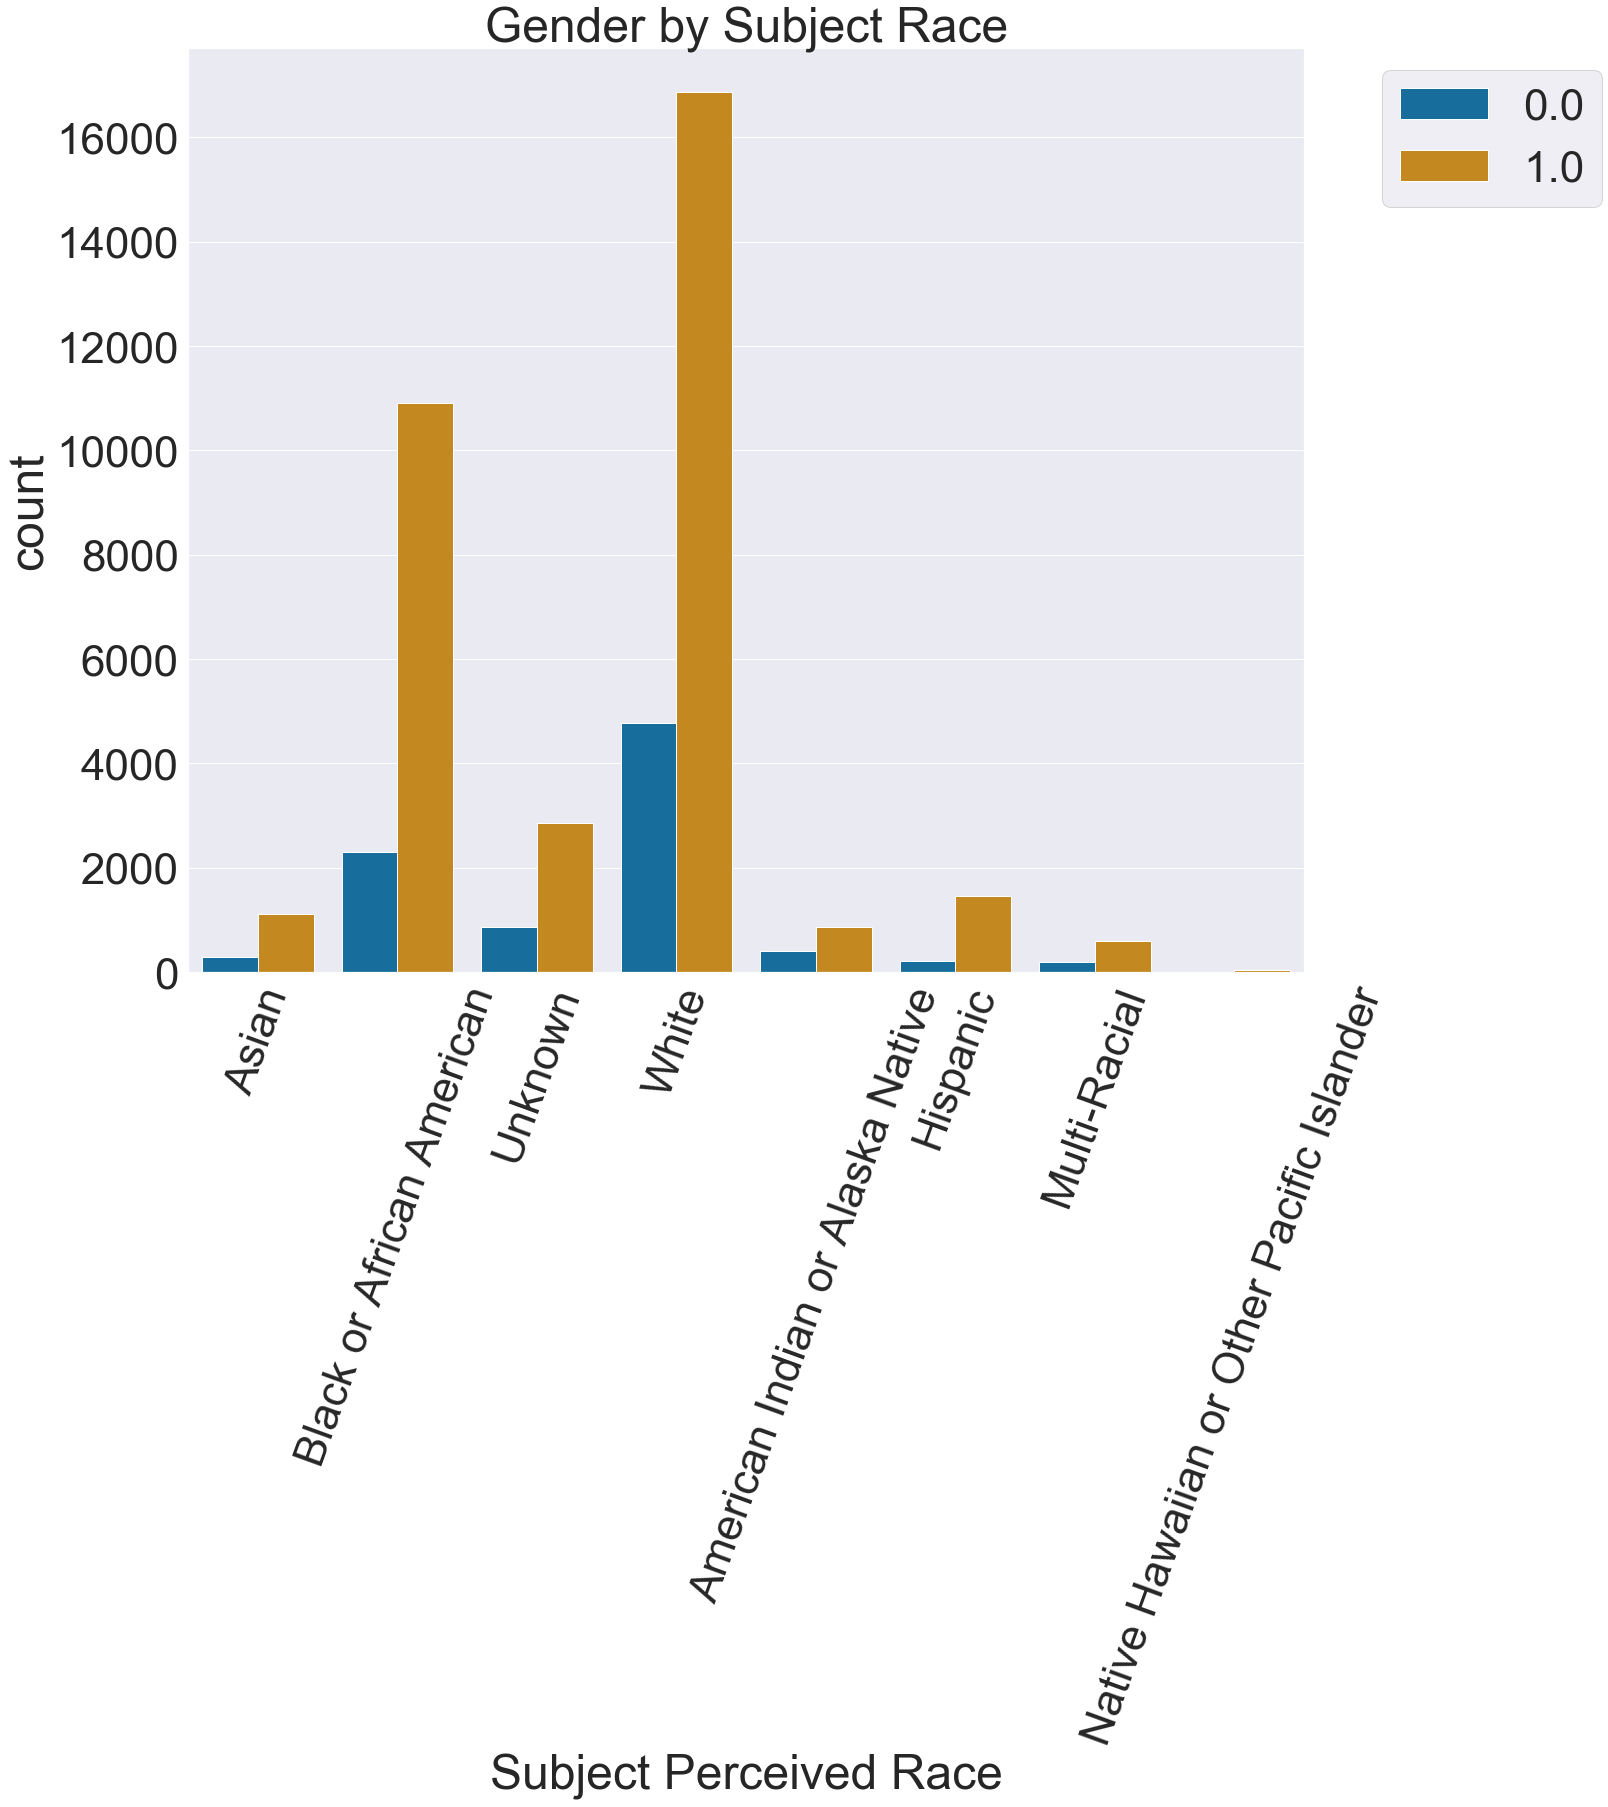

In [26]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4) # Set font on the plot
sns.countplot(x='Subject Perceived Race', hue='Subject Perceived Gender', data=df1, palette="colorblind") 
plt.title('Gender by Subject Race')
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# 2. Does carrying a weapon affect subject arrested?

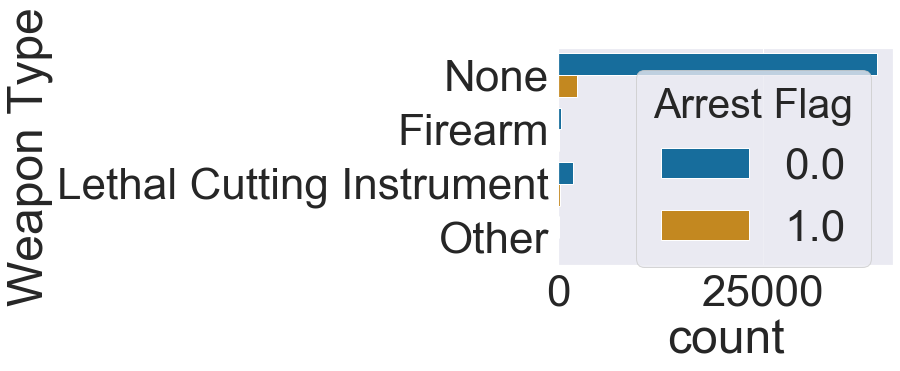

In [27]:
sns.countplot(y = 'Weapon Type', hue = 'Arrest Flag', data = df1, palette="colorblind")

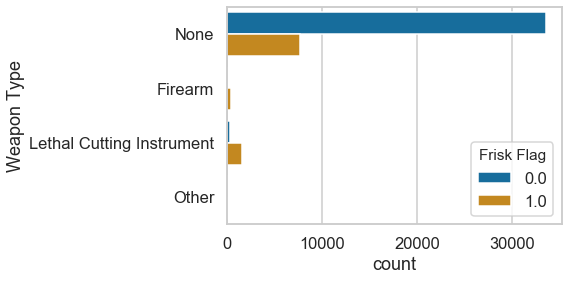

In [28]:
# Now by frisked
sns.set(style="whitegrid", context="talk")
sns.countplot(y = 'Weapon Type', hue = 'Frisk Flag', data = df1, palette="colorblind")

# 3. Is reporting adequate? How can it improve?